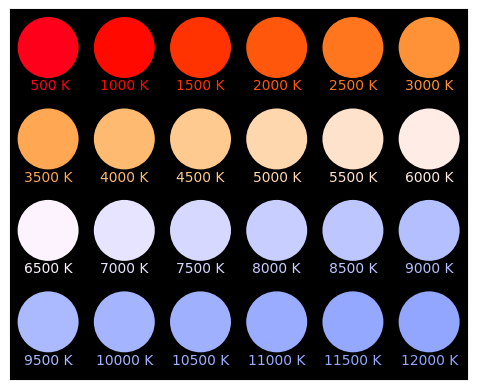

In [14]:
import numpy as np
from scipy.constants import h, c, k
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from colour_system import *
cs = cs_hdtv

def planck(lam, T):
    """ Returns the spectral radiance of a black body at temperature T.

    Returns the spectral radiance, B(lam, T), in W.sr-1.m-2 of a black body
    at temperature T (in K) at a wavelength lam (in nm), using Planck's law.

    """

    lam_m = lam / 1.e9
    fac = h*c/lam_m/k/T
    B = 2*h*c**2/lam_m**5 / (np.exp(fac) - 1)
    return B

fig, ax = plt.subplots()

# The grid of visible wavelengths corresponding to the grid of colour-matching
# functions used by the ColourSystem instance.
lam = np.arange(380., 781., 5)

for i in range(24):
    # T = 500 to 12000 K
    T = 500*i + 500

    # Calculate the black body spectrum and the HTML hex RGB colour string
    # it looks like
    spec = planck(lam, T)
    html_rgb = cs.spec_to_rgb(spec, out_fmt='html')

    # Place and label a circle with the colour of a black body at temperature T
    x, y = i % 6, -(i // 6)
    circle = Circle(xy=(x, y*1.2), radius=0.4, fc=html_rgb)
    ax.add_patch(circle)
    ax.annotate('{:4d} K'.format(T), xy=(x, y*1.2-0.5), va='center',
                ha='center', color=html_rgb)

# Set the limits and background colour; remove the ticks
ax.set_xlim(-0.5,5.5)
ax.set_ylim(-4.35, 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('k')
# Make sure our circles are circular!
ax.set_aspect("equal")
plt.show()

(1988, 2)
[ 1  1  1 ... 81 81 81]


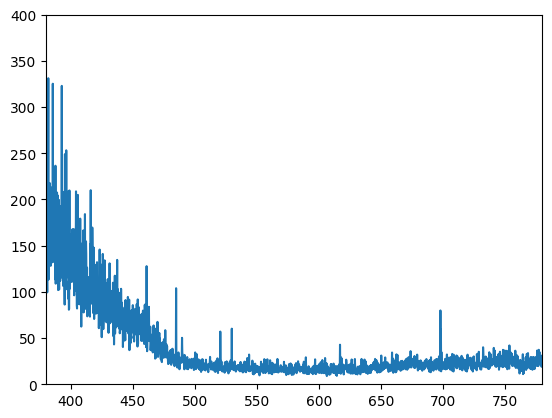

In [31]:
# trying our own
spec = planck(lam, T)
html_rgb = cs.spec_to_rgb(spec, out_fmt='html')

# wavelengths defined in the color matching function
lam = np.arange(380., 781., 5)

# import data for one spectrum
spec_fine = np.genfromtxt("./spectra/redred1.txt")
plt.plot(spec_fine[:,0], spec_fine[:,1])
plt.xlim(380, 780)
plt.ylim(0, 400)

# truncate
spec_fine = spec_fine[spec_fine[:,0]>380]
spec_fine = spec_fine[spec_fine[:,0]<781]

# re-bin to match the color matching function
indices = np.digitize(spec_fine[:,0], lam)
